Intro to supervised ML.
Imports needed first:

In [27]:
# Libraries to manage data
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Imports to visualise data
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot

# Libraries for the classifier

from sklearn.tree import DecisionTreeClassifier # for decision trees
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

# for checks
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

# for time
import timeit


After importing all of the modules, we can begin by grabbing our dataset and cleaning it before doing operaations.

In [44]:
b_cancer = datasets.load_breast_cancer() 
dataset = pd.DataFrame(data=b_cancer.data, columns=b_cancer.feature_names)
dataset["target"] = b_cancer.target
print(dataset["target"])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64


For now, we will detect any N/A data and simply remove them.

In [45]:
print("Shows NAs per column!")
dataClean = dataset.dropna(axis=0, how="any")
print(dataClean.isna().sum())

Shows NAs per column!
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


Some variables are correlated with another variable. Correlations product redundancy in the information and affects the models. They can be easily removed:

In [46]:
corr_matrix = dataClean.corr().abs()
ones = np.ones(corr_matrix.shape) # creates same size matrix of ones
mask = np.triu(ones,k=1)
# [[0. 1. 1. 1. 1.]
#  [0. 0. 1. 1. 1.]
#  [0. 0. 0. 1. 1.]
#  [0. 0. 0. 0. 1.]
#  [0. 0. 0. 0. 0.]]
mask = mask.astype(bool) # Convert it to True and falses.
upper_triangle = corr_matrix.where(mask)
print(upper_triangle)

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                      NaN      0.323782        0.997855   0.987357   
mean texture                     NaN           NaN        0.329533   0.321086   
mean perimeter                   NaN           NaN             NaN   0.986507   
mean area                        NaN           NaN             NaN        NaN   
mean smoothness                  NaN           NaN             NaN        NaN   
mean compactness                 NaN           NaN             NaN        NaN   
mean concavity                   NaN           NaN             NaN        NaN   
mean concave points              NaN           NaN             NaN        NaN   
mean symmetry                    NaN           NaN             NaN        NaN   
mean fractal dimension           NaN           NaN             NaN        NaN   
radius error                     NaN           NaN             NaN        NaN   
texture error               

After having obtained the upper triangle of the correlation matrix, we now need to check whether each column has a correlation value above 0.95 with another column, and as such we grab that column.

In [47]:
columns_to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(columns_to_drop)

['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']


So let's remove these columns.

In [48]:
readyData = dataClean.drop(columns_to_drop, axis=1)
print(readyData.head())

   mean radius  mean texture  mean smoothness  mean compactness  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   mean concavity  mean concave points  mean symmetry  mean fractal dimension  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius error  texture error  ...  symmetry error  fractal dimension error  \
0        1.0950         0.9053

Let's visualise the data now via seaborn! (sns).

<Axes: xlabel='target', ylabel='count'>

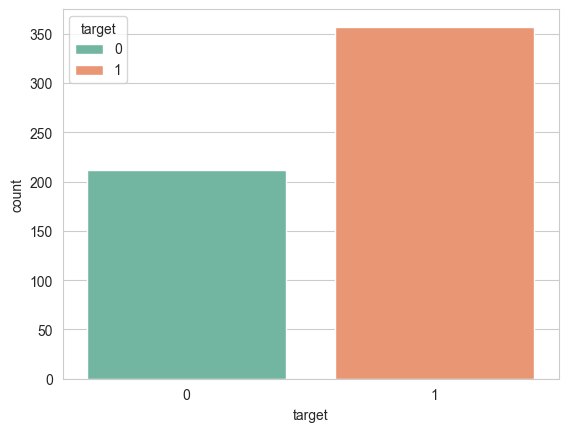

In [49]:
sns.set_style("whitegrid")
sns.countplot(x="target", data=dataClean, palette="Set2", hue="target")

Let's make the first classifier.

In [50]:
X = readyData.iloc[:,:-1]
Y = readyData.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)
print(X)
print(Y)

     mean radius  mean texture  mean smoothness  mean compactness  \
0          17.99         10.38          0.11840           0.27760   
1          20.57         17.77          0.08474           0.07864   
2          19.69         21.25          0.10960           0.15990   
3          11.42         20.38          0.14250           0.28390   
4          20.29         14.34          0.10030           0.13280   
..           ...           ...              ...               ...   
564        21.56         22.39          0.11100           0.11590   
565        20.13         28.25          0.09780           0.10340   
566        16.60         28.08          0.08455           0.10230   
567        20.60         29.33          0.11780           0.27700   
568         7.76         24.54          0.05263           0.04362   

     mean concavity  mean concave points  mean symmetry  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.18

After having obtained our training and test data,let's use it on some models!

              precision    recall  f1-score   support

           0       0.97      0.88      0.93        43
           1       0.93      0.99      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



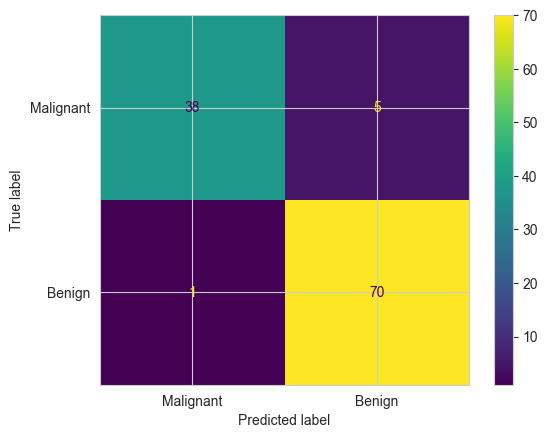

In [ ]:
model = SVC(kernel="linear")
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
confus = confusion_matrix(Y_test,predictions)
print(classification_report(Y_test,predictions))


# 0 for malignant, 1 for benign
disp = ConfusionMatrixDisplay(confusion_matrix=confus,display_labels=["Malignant","Benign"])
disp.plot()

Now let's add a kernel to the support vector machine

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



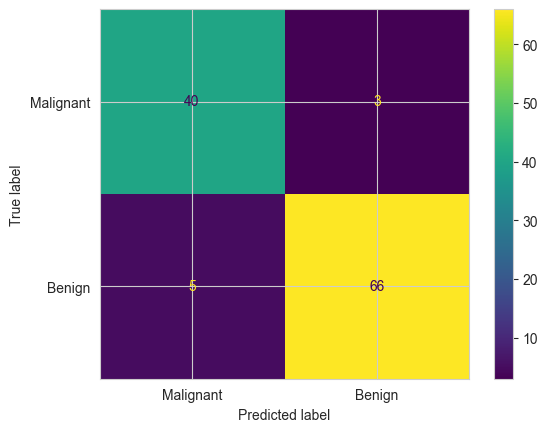

In [39]:
model = SVC(kernel="rbf",gamma="auto")
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
conf = (confusion_matrix(Y_test,predictions))
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Malignant","Benign"])
conf_display.plot()

print(classification_report(Y_test,predictions))

Let's now implement a Naive bayes classifier which assumes all features are independent. Works well for text and categorical data, more malignant => higher likelihood of malignant. 
Naive since it assumes all features 100% independent.

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        34
           1       0.97      0.91      0.94        80

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



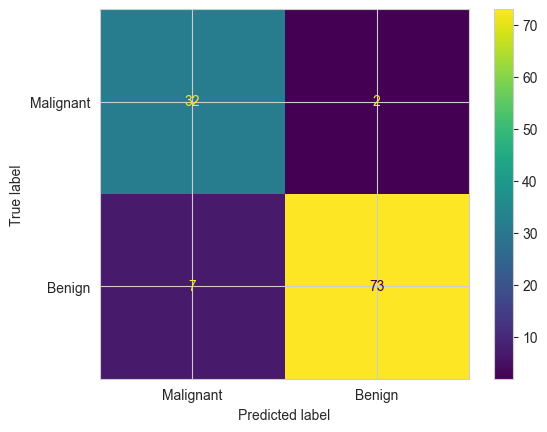

In [51]:
model = GaussianNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
conf = (confusion_matrix(Y_test,predictions))
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Malignant","Benign"])
conf_display.plot()

print(classification_report(Y_test,predictions))

Tree based algo (using decision trees)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.97      0.99        38

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



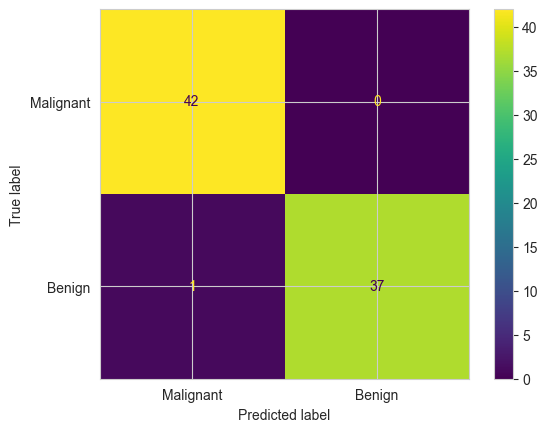

In [42]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
conf = (confusion_matrix(Y_test,predictions))
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Malignant","Benign"])
conf_display.plot()

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        38

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



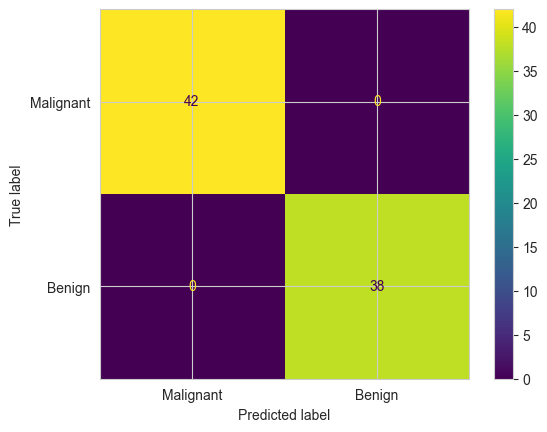

In [43]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
conf = (confusion_matrix(Y_test,predictions))
conf_display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=["Malignant","Benign"])
conf_display.plot()

print(classification_report(Y_test,predictions))

Cross validation on ML:
We will now apply different ML algos directly to the data to create classification models to predict the class of a new input and validate the models with 10-fold cross validation.

In [ ]:
models = []
models.append(("Tree",DecisionTreeClassifier()))
models.append(("kNN",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))
models.append(("SVM",SVC(gamma="auto")))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("NeuralNet",MLPClassifier(random_state=1,max_iter=300)))

results = []
names = []


for name,model in models:
    start = timeit.default_timer()
    cv_fold = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=cv_fold,scoring="accuracy")
    stop = timeit.default_timer()
    results.append(cv_results)
    names.append(name)

    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
    print("Time: ",stop-start)

Tree: 0.903043 (0.049069)
Time:  0.061106800014385954
kNN: 0.912174 (0.040308)
Time:  0.14295589999528602
Naive Bayes: 0.918502 (0.030210)
Time:  0.02229690001695417
SVM: 0.929614 (0.039214)
Time:  0.036962299986043945
RandomForest: 0.949275 (0.024641)
Time:  1.0654675999830943


c:\Users\adirj\AdiFolder\Coding projects\KCL-JupyterNotebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\adirj\AdiFolder\Coding projects\KCL-JupyterNotebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\adirj\AdiFolder\Coding projects\KCL-JupyterNotebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\adirj\AdiFolder\Coding projects\KCL-JupyterNotebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Opti

NeuralNet: 0.925459 (0.041504)
Time:  2.12814850002178


c:\Users\adirj\AdiFolder\Coding projects\KCL-JupyterNotebooks\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Let's plot it!

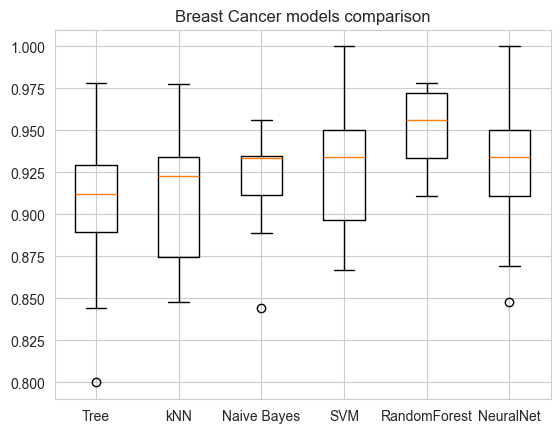

In [56]:
pyplot.boxplot(results,tick_labels=names)
pyplot.title("Breast Cancer models comparison")
pyplot.show()

We can now select the best classifier and show its ROC curve!

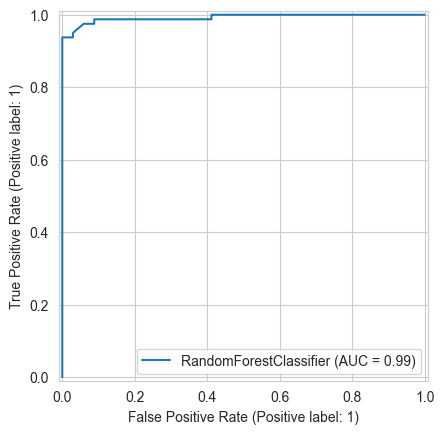

In [57]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
RocCurveDisplay.from_estimator(model,X_test,Y_test)